### **Image Processing** Malaria in Red Blood Cells

**with Multiple Template Matching**

*By Mohammad Attala Rajafar*

Credit to:    
1. [Opencv Template Matching Documentation](https://docs.opencv.org/3.4/d4/dc6/tutorial_py_template_matching.html)
2. [ClarityCoders Videos](https://www.youtube.com/watch?v=vXqKniVe6P8)

Import libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


Load images

In [2]:
blood_imgRGB = cv2.imread(
    'D:\\Work\\Tech\\Data Science\\Python\\Notebook\\Malaria detection\\Multiple_Template_Matching\\Images\\redbloodcellRGB.png', cv2.IMREAD_UNCHANGED)
blood_img = cv2.imread(
    'D:\\Work\\Tech\\Data Science\\Python\\Notebook\\Malaria detection\\Multiple_Template_Matching\\Images\\redbloodcell.png', cv2.IMREAD_UNCHANGED)
malaria_img = cv2.imread(
    'D:\\Work\\Tech\\Data Science\\Python\\Notebook\\Malaria detection\\Multiple_Template_Matching\\Images\\malaria.png', cv2.IMREAD_UNCHANGED)


Create variable for result (result) and location based on value (value)

In [3]:
result = cv2.matchTemplate(blood_img, malaria_img, cv2.TM_CCOEFF_NORMED)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
max_loc


(41, 168)

View the maximum accuracy value of the created location

In [4]:
max_val

0.9839351177215576

Creating width and height variables from the checkbox

In [5]:
# Variable w, h
w = malaria_img.shape[1]
h = malaria_img.shape[0]

In [6]:
# Rectangle
cv2.rectangle(blood_img, max_loc, (max_loc[0] + w, max_loc[1] + h), (255,0,0), 0)

array([[[255, 252, 253],
        [255, 253, 253],
        [254, 252, 251],
        ...,
        [246, 253, 246],
        [247, 254, 247],
        [247, 254, 247]],

       [[255, 253, 254],
        [255, 253, 253],
        [254, 252, 251],
        ...,
        [243, 250, 243],
        [245, 252, 245],
        [246, 253, 246]],

       [[255, 252, 253],
        [255, 253, 253],
        [254, 252, 252],
        ...,
        [244, 248, 243],
        [246, 250, 244],
        [247, 251, 245]],

       ...,

       [[214, 197, 206],
        [216, 201, 209],
        [220, 208, 214],
        ...,
        [251, 253, 253],
        [252, 252, 252],
        [253, 253, 253]],

       [[216, 199, 208],
        [220, 205, 213],
        [231, 219, 225],
        ...,
        [250, 252, 252],
        [251, 251, 251],
        [252, 252, 252]],

       [[220, 203, 212],
        [226, 211, 219],
        [240, 228, 234],
        ...,
        [251, 253, 253],
        [252, 252, 252],
        [253, 253, 253]]

Make image processing easier with the binary thresholding method

In [7]:
threshold = .43
yloc, xloc = np.where(result >= threshold)


Create a checkbox according to the number of matches in the image template

In [8]:
# Multiple Rectangle
len(xloc)
for (x,y) in zip (xloc,yloc): cv2.rectangle (blood_img, (x,y), (x + w, y + h), (255,0,0), 0)

Visualization

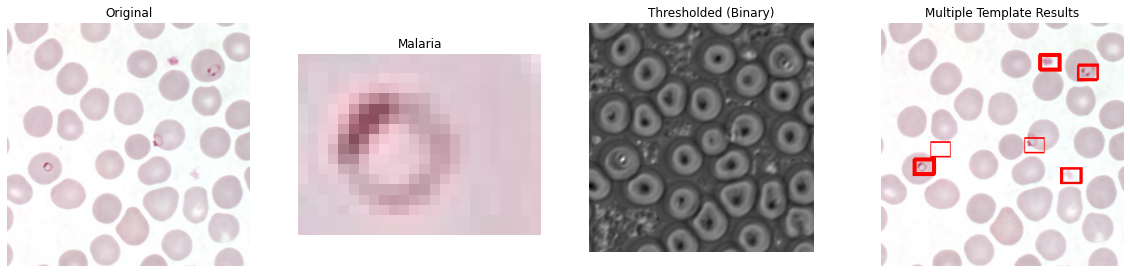

In [9]:
fig, axes = plt.subplots(ncols=4, figsize=(20, 20))
ax = axes.ravel()


ax[0] = plt.subplot(2, 4, 1)
ax[1] = plt.subplot(2, 4, 2)
ax[2] = plt.subplot(2, 4, 3, sharex=ax[0], sharey=ax[0])
ax[3] = plt.subplot(2, 4, 4, sharex=ax[0], sharey=ax[0])


ax[0].imshow(blood_imgRGB)
ax[0].set_title('Original')
ax[0].axis('off')


ax[1].imshow(malaria_img, cmap=plt.cm.gray)
ax[1].set_title('Malaria')
ax[1].axis('off')


ax[2].imshow(result, cmap=plt.cm.gray)
ax[2].set_title('Thresholded (Binary)')
ax[2].axis('off')


ax[3].imshow(blood_img)
ax[3].set_title('Multiple Template Results')
ax[3].axis('off')


plt.show()


### End